['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

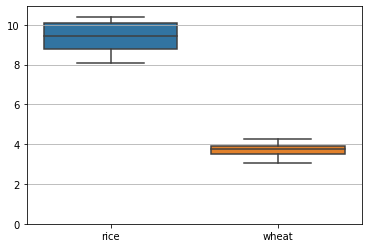

Ttest_indResult(statistic=53.751692036304206, pvalue=7.110465285860583e-55)


C:\Users\USER\AppData\Local\Temp\ipykernel_14300\4236374372.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

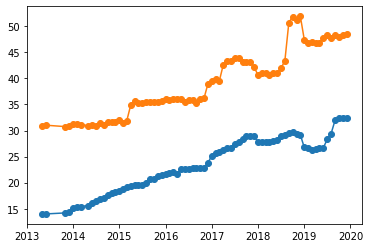

In [10]:
#[Thực hành] Phân tích dữ liệu trên bộ dữ liệu FoodPrice in Turkey
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('FoodPrice_in_Turkey.csv')
#với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg
#liệt kê tên các sản phẩm
product_names = list(df['ProductName'].unique()) 
print(product_names)
# Lọc những bản ghi liên quan tới giá gạo năm 2019
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của gạo năm 2019: ' +str(df_rice.shape[0])) 
df_rice.Price.hist()
#H0 = 9.5
#H1 # 9.5
print( stats.ttest_1samp(df_rice.Price, 9.5))
#Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không
#Kết luận: Với mức ý nghĩa 5% có thể nhận định giá gạo trung bình bằng 9.5 Lira/kg

# Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

# lấy thông tin bột mỳ năm 2019
df_wheat = df.loc[(df.ProductName== 'Wheat flour - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của bột mỳ năm 2019: '+str(df_wheat.shape[0])) 
import seaborn as sns
# Tạo boxplot so sánh phân bố của bột mỳ vào gao
price = {'rice': list(df_rice["Price"]), 'wheat': list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)
plt.show()
#H0: giá bột mì và gạo là giống nhau
print(stats.ttest_ind(price['rice'], price['wheat'], equal_var=False))
#Chúng ta có thể thấy Pvalue = 7.1.10^-55 <<5%, bác bỏ giả thuyết không, chấp nhận giả thuyết đối
#Kết luận: giá bột mỳ và giá gạo trung bình năm 2019 là khác nhau

#Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

# xóa những biến không cần thiết
del (df_rice, df_price, df_wheat, price)
# chuyển đổi dữ liệu ngày tháng
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))
# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')

# Tiền xử lý dữ liệu
# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()

#Giả thuyết không: giá cà phê bằng giá trà công thêm 15 Lira ở mọi thời điểm
#Giả thuyết đối: Giá giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm

# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

#Do pvalue <1% rất nhiều –> Bác bỏ giả thuyết không, chấp nhận giả thuyết đối 
#Giá Cà phê luôn lớn hơn giá trà ít nhất 15 lira mà không bị ảnh hưởng bởi thời gian hay địa điểm

In [ ]:
#[Thực hành] phân tích dữ liệu trên bộ dữ liệu Quản lý chất lượng
#Yêu cầu: Tiến hành viết giả thuyết kiểm định về chất lượng sản phẩm với mức ý nghĩa 0.01.
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_excel('data\Quality.xlsx')
print(df.head())
df.info()
# Tiền xử lý dữ liệu
# gom hết dữ liệu của 4 mẫu thành 1 mảng duy nhất
sample = list()
for i in df.columns:
    sample.extend(df[i].tolist())

# tiến hành mô tả dữ liệu mẫu
df = pd.DataFrame(columns=['sample'], data= sample) 
df.describe()
#Giả thuyết không: khối lượng trung bình của sản phẩm = 12
#Giả thuyết đối: Khối lượng trung bình của sản phẩm # 12
print (stats.ttest_1samp(sample,12))
#Do pvalue > 0.01 –> Chấp nhận giả thuyết 0.

5 bản ghi đầu tiên của bộ dữ liệu 
     Ohio  Atlanta
STT               
1    0.88     3.85
2    2.06     0.00
3    0.00     0.00
4    0.70     0.02
5    1.64     0.58
thông tin bộ dữ liệu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ohio     50 non-null     float64
 1   Atlanta  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB
None
mô tả bộ dữ liệu
            Ohio    Atlanta
count  50.000000  50.000000
mean    1.746800   1.614800
std     1.092211   1.061068
min     0.000000   0.000000
25%     0.835000   0.682500
50%     1.615000   1.495000
75%     2.350000   2.402500
max     5.000000   3.860000
Ttest_indResult(statistic=0.6129544104328379, pvalue=0.5413275550760535)


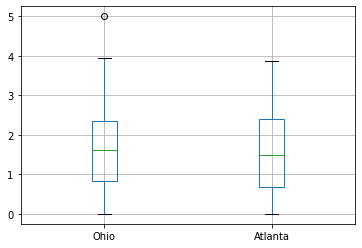

In [13]:
import pandas as pd
from scipy import  stats
import matplotlib.pyplot as plt
df = pd.read_excel("Coca_cola_use.xlsx", index_col= 'STT')
print ("5 bản ghi đầu tiên của bộ dữ liệu ")
print (df.head())
print ("thông tin bộ dữ liệu")
print (df.info())
print ("mô tả bộ dữ liệu")
print (df.describe())
df.boxplot()
#Giả thuyết không: a1-a2 =0
#Giả thuyết đối: a1-a2>0
#mức ý nghĩa 5%
#Loại kiểm định Independent T test
print (stats.ttest_ind(df.Ohio, df.Atlanta,equal_var=False))
#Chúng ta nhìn thấy rằng: pvalue > 5% rất nhiều nên không đủ cơ sở để bác bỏ giả thuyết không
#Kết luận: Không đủ căn cứ để kết luận rằng lượng tiêu thụ coca trung bình ở Ohio lớn hơn ở Atlanta

In [4]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('GDPlist.csv',encoding = "ISO-8859-1")
print(df.info())
#Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm
#H0: Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm
#H1: Trung bình GDP của các quốc gia trên thế giới không là 500 tỉ usd/năm
print( stats.ttest_1samp(df["GDP (millions of US$)"], popmean=500000))
#pvalue = 71% --> H0 tương đối chính xác với xác suất chính xác tối thiểu là 70%

#GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không
#H0: trung bình ở các quốc gia ở châu Âu cao hơn châu Á
#H1: trung bình ở các quốc gia ở châu Âu không cao hơn châu Á

euro = df.query("Continent == 'Europe'")['GDP (millions of US$)']
asia = df.query("Continent == 'Asia'")['GDP (millions of US$)']
tstatic, pvalue = stats.ttest_ind(euro, asia, alternative='greater')
print(tstatic, pvalue)
#Kết luận: các nước châu âu giàu hơn châu á với xác suất chính xác nhỏ nhất là 71%

#GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
#H0: GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
#H1: GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là không bằng nhau
a = ['South America', 'North America']
america = df.query("Continent in @a")['GDP (millions of US$)']
print(stats.ttest_ind(america, euro, equal_var=False))
#Kết luận: Không thể kết luận châu và châu Mỹ có GDP bằng nhau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB
None
Ttest_1sampResult(statistic=0.3757438669518338, pvalue=0.7077493494055246)
-0.5586877419842816 0.7109336599036772
Ttest_indResult(statistic=0.7882914270473153, pvalue=0.43961393931830917)


Ttest_indResult(statistic=7.583860613033518, pvalue=6.44185782026874e-14)
Ttest_indResult(statistic=-2.1462117638680636, pvalue=0.016128906608806812)


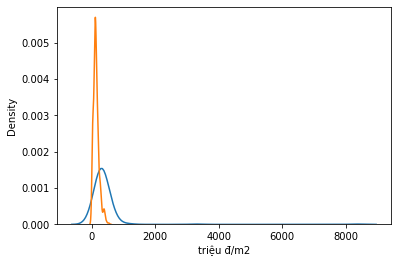

In [24]:
#[Bài tập] Kiểm định House Price Đống Đa Hà Nội
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')
data["triệu đ/m2"] = data.price/data.area
data.drop(data.loc[data["area"] == 0].index,axis = 0,inplace = True)
data.dropna(subset=['triệu đ/m2'],inplace=True)
data['land_certificate'] = data['land_certificate'].fillna("0")
#Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ
nhapho = data.query("property_type == 'mat pho'")['triệu đ/m2']
nhango = data.query("property_type == 'trong ngo'")['triệu đ/m2']
sns.kdeplot(nhapho)
sns.kdeplot(nhango);

#Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%
#H0: giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ
#H1: giả thuyết giá (triệu đ/m2) nhà mặt phố không cao hơn giá nhà trong ngõ

print(stats.ttest_ind(nhapho, nhango, alternative='greater'))

#Ho sai. kết luận: nhà mặt phố không cao hơn giá nhà trong ngõ

#Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
#với mức ý nghĩa 5%
#H0: nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
#H1: nhà không có thông tin về giấy tờ pháp lý ko thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
land_certificate = data.query("land_certificate == 'So do'")['triệu đ/m2']
not_certificate = data.query("land_certificate == '0'")['triệu đ/m2']
print(stats.ttest_ind(land_certificate, not_certificate, alternative='less'))
##Ho sai. kết luận: nhà không có thông tin về giấy tờ pháp lý ko thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 

In [35]:
#[Bài tập] Kiểm định giả thuyết trên bộ dữ liệu credit scoring
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Credit_Scoring.csv", encoding = "ISO-8859-1")
df.dropna(subset=['NumberOfDependents'],inplace=True)
df.dropna(subset=['MonthlyIncome'],inplace=True)

#Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome)
#nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)
#H0: khách hàng không có người phụ thuộc sẽ có thu nhập nhỏ hơn những khách hàng có người phụ thuộc
#H1: khách hàng không có người phụ thuộc sẽ có thu nhập không nhỏ hơn những khách hàng có người phụ thuộc

Dependent = df.query("NumberOfDependents != 'So do'")['MonthlyIncome']
not_Dependent = df.query("NumberOfDependents == 0")['MonthlyIncome']
print(stats.ttest_ind(not_Dependent, Dependent, alternative='less'))
#H0 sai: khách hàng không có người phụ thuộc sẽ có thu nhập không nhỏ hơn những khách hàng có người phụ thuộc

#Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) 
#thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%
#H0: trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây cao hơn
#H1: trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây không cao hơn
SeriousDlqin2yrs = df.query("SeriousDlqin2yrs == 1")['NumberOfOpenCreditLinesAndLoans']
Not_SeriousDlqin2yrs = df.query("SeriousDlqin2yrs == 0")['NumberOfOpenCreditLinesAndLoans']
print(stats.ttest_ind(SeriousDlqin2yrs, Not_SeriousDlqin2yrs, alternative='greater'))
#H0 sai : trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây không cao hơn

Ttest_indResult(statistic=-12.472535446813929, pvalue=5.4475951849119754e-36)
Ttest_indResult(statistic=-9.533971212477503, pvalue=1.0)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

5      217.073171
72      93.939394
73     119.607843
75      93.939394
76     109.090909
          ...    
662    200.000000
664    401.315789
666    139.880952
668    291.666667
669    551.111111
Name: triệu đ/m2, Length: 256, dtype: float64